# Ansambl metode

In [8]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import export_text
from sklearn.tree import plot_tree

In [9]:
train = pd.read_csv('train.csv')
train.info()
train.drop(['PassengerId','Name','Ticket','Cabin'],axis=1,inplace=True)
train.info()
train_x = train.drop('Survived', axis=1, inplace=False)
train_y = train['Survived']
train_x.info()
train_y.info()

test = pd.read_csv('test.csv')
test.info()
test.drop(['PassengerId','Name','Ticket','Cabin'],axis=1,inplace=True)
test.info()
test_x = test.drop('Survived', axis=1, inplace=False)
test_y = test['Survived']
test_x.info()
test_y.info()

freq = train_x.count()
freq_df = pd.DataFrame([freq],columns=train_x.columns)
print(freq_df.head())

num_pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy="median")), 
    ('std_scaler', StandardScaler())
])
cat_pipeline = Pipeline([
    ('cat_imputer', SimpleImputer(strategy='most_frequent')),
    ('one_hot', OneHotEncoder())
])
num_attr = ['Age', 'SibSp', 'Parch', 'Fare']
cat_attr = ['Pclass', 'Sex', 'Embarked']

full_pipeline = ColumnTransformer([("num", num_pipeline, num_attr), 
                                   ("cat", cat_pipeline, cat_attr)])
train_x = full_pipeline.fit_transform(train_x)
train_x.shape

num_pipeline_test = Pipeline([
    ('imputer', SimpleImputer(strategy="median")), 
    ('std_scaler', StandardScaler())
])
cat_pipeline_test = Pipeline([
    ('cat_imputer', SimpleImputer(strategy='most_frequent')),
    ('one_hot', OneHotEncoder())
])
num_attr_test = ['Age', 'SibSp', 'Parch', 'Fare']
cat_attr_test = ['Pclass', 'Sex', 'Embarked']

full_pipeline_test = ColumnTransformer([("num", num_pipeline_test, num_attr_test), 
                                   ("cat", cat_pipeline_test, cat_attr_test)])
test_x = full_pipeline_test.fit_transform(test_x)

train_x.shape

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-

(891, 12)

In [10]:
tree = DecisionTreeClassifier()
tree.fit(train_x, train_y)

DecisionTreeClassifier()

In [11]:
print(export_text(tree))

|--- feature_7 <= 0.50
|   |--- feature_0 <= -1.76
|   |   |--- feature_1 <= 1.79
|   |   |   |--- class: 1
|   |   |--- feature_1 >  1.79
|   |   |   |--- feature_3 <= -0.02
|   |   |   |   |--- class: 0
|   |   |   |--- feature_3 >  -0.02
|   |   |   |   |--- feature_0 <= -2.06
|   |   |   |   |   |--- class: 0
|   |   |   |   |--- feature_0 >  -2.06
|   |   |   |   |   |--- class: 1
|   |--- feature_0 >  -1.76
|   |   |--- feature_4 <= 0.50
|   |   |   |--- feature_3 <= 0.39
|   |   |   |   |--- feature_0 <= -1.26
|   |   |   |   |   |--- feature_1 <= 1.34
|   |   |   |   |   |   |--- feature_11 <= 0.50
|   |   |   |   |   |   |   |--- feature_0 <= -1.37
|   |   |   |   |   |   |   |   |--- class: 0
|   |   |   |   |   |   |   |--- feature_0 >  -1.37
|   |   |   |   |   |   |   |   |--- class: 1
|   |   |   |   |   |   |--- feature_11 >  0.50
|   |   |   |   |   |   |   |--- class: 1
|   |   |   |   |   |--- feature_1 >  1.34
|   |   |   |   |   |   |--- class: 0
|   |   |   |   |--

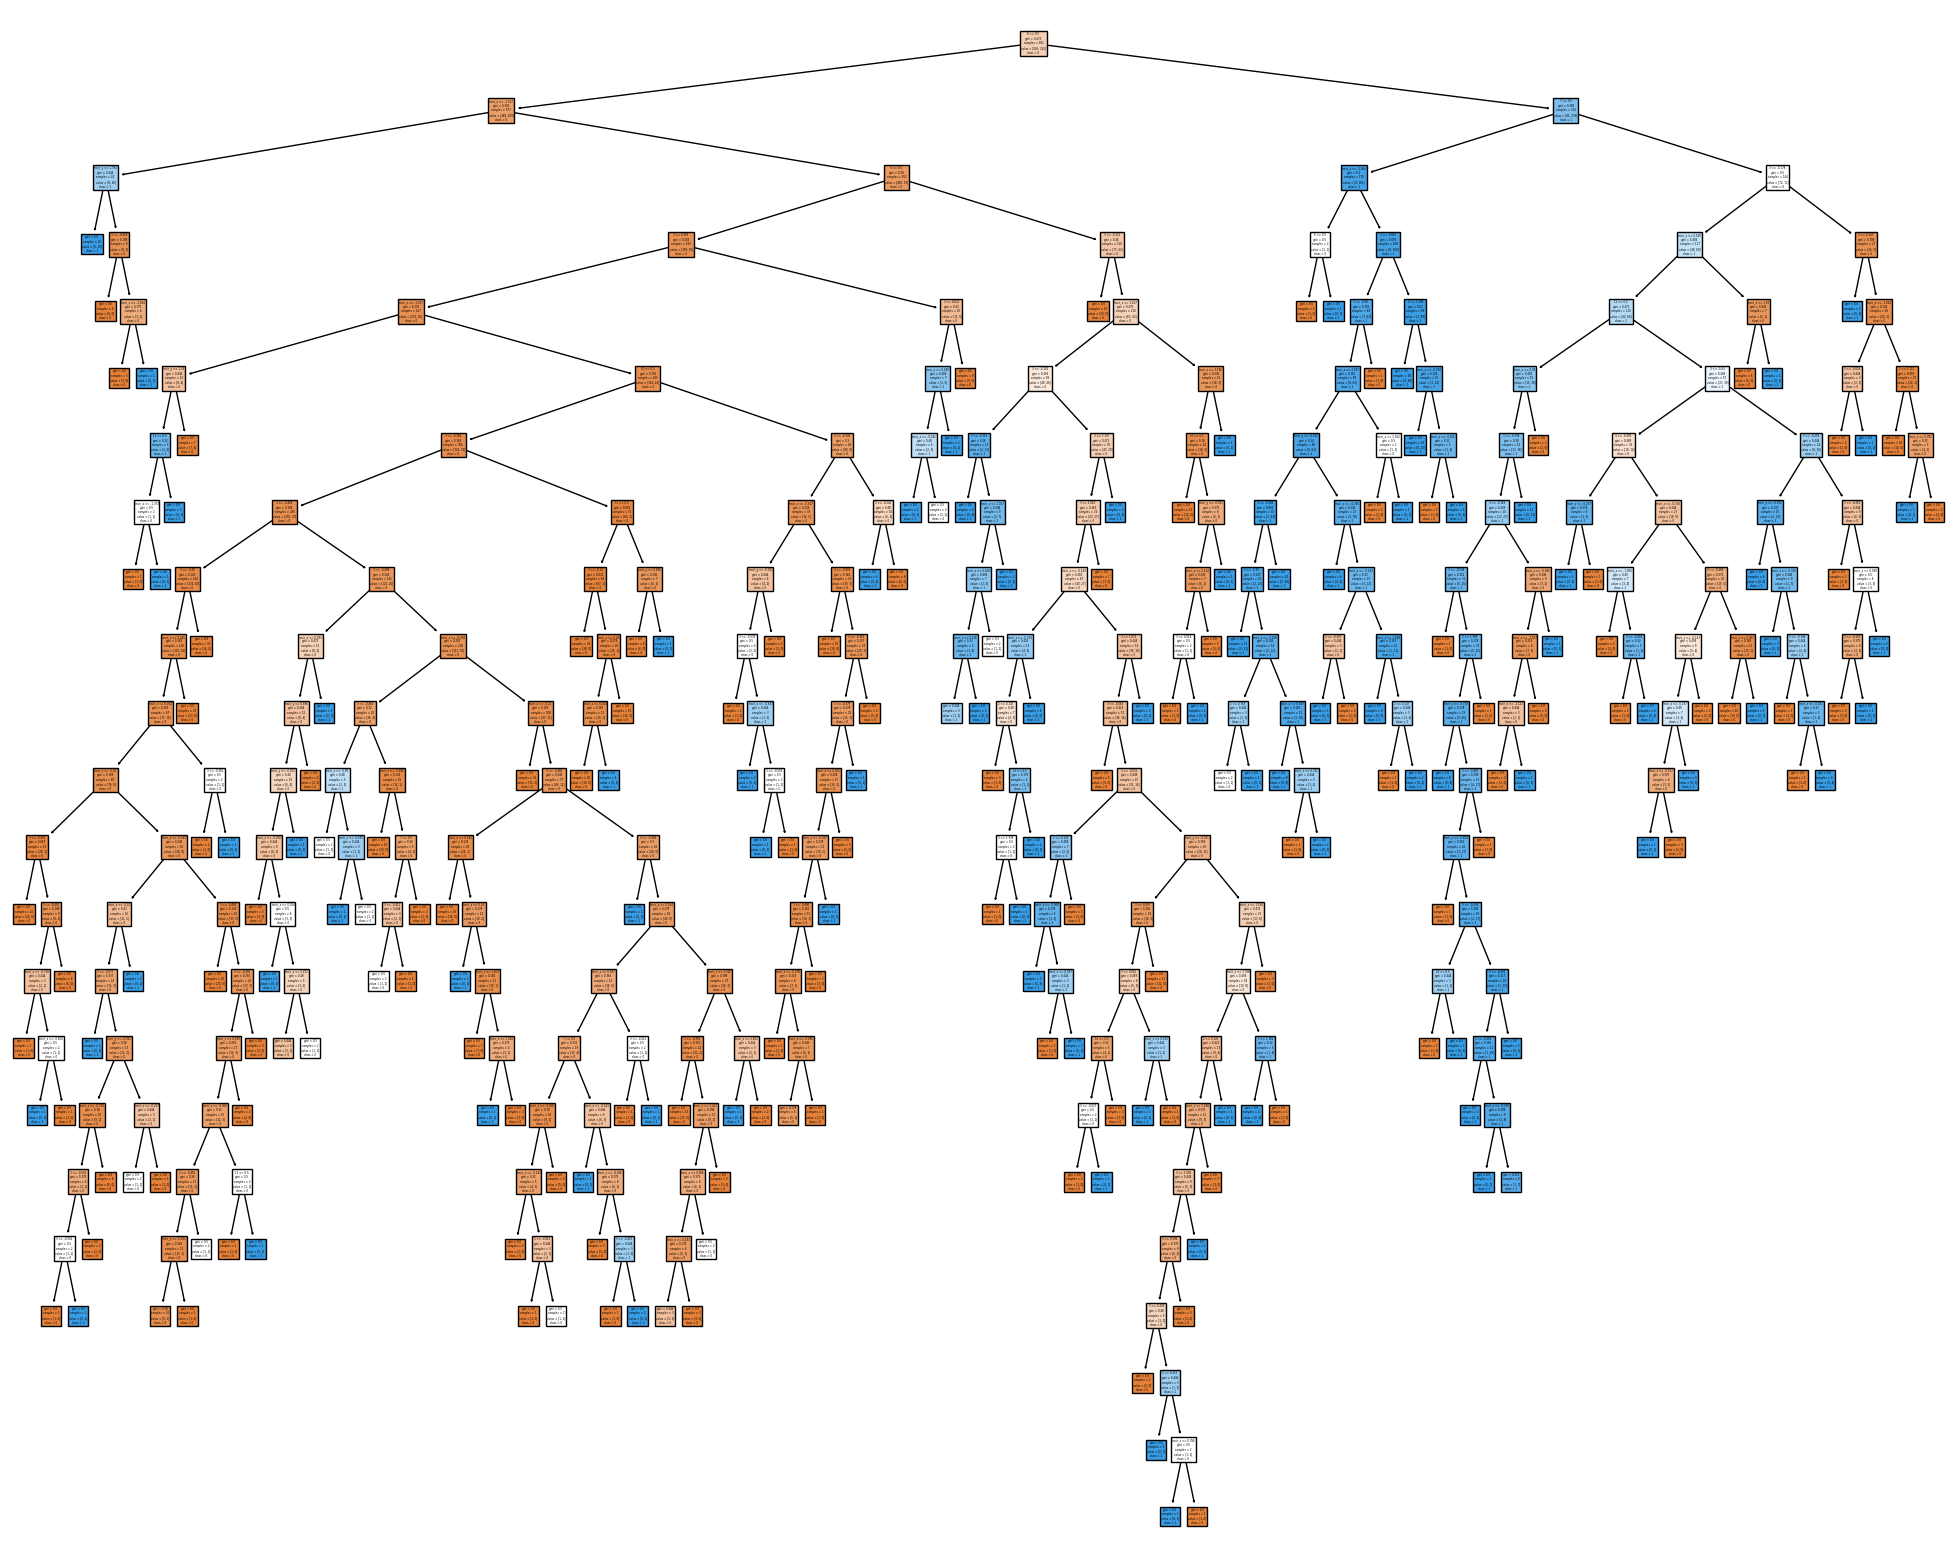

In [12]:
fig = plt.figure(figsize=(25,20))
plot_tree(tree, feature_names=['train_x', 'train_y','2','3','5','6','7','8','9','10','11','12'],
          class_names=[str(x) for x in np.unique(train_y)],
          filled=True);


In [13]:
tree.score(test_x,test_y)

0.6889952153110048